In [1]:
import sys
import pickle

# Support packages
import numpy as np
import pandas as pd

# Plotting packages
import seaborn as sns
import matplotlib.pyplot as plt

# Local packages/files
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data


/Users/preston/PycharmProjects/MLProject/venv/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)


# Question 1 
Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?**

> The goal of this project is to train a supervised maching learning algorithm using data obtained from the Enron Scandal. This data set contains financial information and email data from various employees in the former company. Enron was an energy commodities and services corporation that went bankrupt in 2001 due to fraud. You can learn more about the scandal [here](https://en.wikipedia.org/wiki/Enron_scandal). This ML project will attempt to classify whether an Enron employee was a person of interest (POI).  
<br>
<br>


> I used a scatterplot chart to show the correlation between total_payments and total_stock_value. I could see that there was a datapoint that was clearly an outlier. Sorting the chart by 'total_payments', I could see that this was 'LAY KENNETH L' with 103,559,793.00. The next highest was 'FREVERT MARK A' with 17,252,530.00. I decided to remove 'LAY KENNETH L' so it would not alter the output too much. 

I converted the dataset to a pandas dataframe for easier manipulation and cleaning. Using `df.info()` i could set that there were 146 rows(names) and 21 columns(attributes). Since this was a low enough amount, I printed the names and reviewed for anything that might stick out to me. The rows, 'TOTAL' and 'THE TRAVEL AGENCY IN THE PARK' stuck out particularly as these are not names. I decided to remove them from the dataset using the `df.drop()` function. While reviewing the data table, I also noticed that 'LOCKHART EUGENE E' had no data and was not listed as a 'poi' so I removed this as well. I then replaced `'NaN'` values with `np.nan` to help with my data exploration.  

In [3]:
df = pd.DataFrame.from_dict(data_dict, orient = 'index')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       146 non-null object
to_messages                  146 non-null object
deferral_payments            146 non-null object
total_payments               146 non-null object
exercised_stock_options      146 non-null object
bonus                        146 non-null object
restricted_stock             146 non-null object
shared_receipt_with_poi      146 non-null object
restricted_stock_deferred    146 non-null object
total_stock_value            146 non-null object
expenses                     146 non-null object
loan_advances                146 non-null object
from_messages                146 non-null object
other                        146 non-null object
from_this_person_to_poi      146 non-null object
poi                          146 non-null bool
director_fees                146 non-null object
deferred_income              146 non-null object


In [4]:
# Convert NaN strings to np.nan values
df = df.replace('NaN', np.nan)

# create a list of the employees to visually inspect the names
names = pd.Series(list(data_dict.keys()))

for i in names:
    print(i)


METTS MARK
BAXTER JOHN C
ELLIOTT STEVEN
CORDES WILLIAM R
HANNON KEVIN P
MORDAUNT KRISTINA M
MEYER ROCKFORD G
MCMAHON JEFFREY
HORTON STANLEY C
PIPER GREGORY F
HUMPHREY GENE E
UMANOFF ADAM S
BLACHMAN JEREMY M
SUNDE MARTIN
GIBBS DANA R
LOWRY CHARLES P
COLWELL WESLEY
MULLER MARK S
JACKSON CHARLENE R
WESTFAHL RICHARD K
WALTERS GARETH W
WALLS JR ROBERT H
KITCHEN LOUISE
CHAN RONNIE
BELFER ROBERT
SHANKMAN JEFFREY A
WODRASKA JOHN
BERGSIEKER RICHARD P
URQUHART JOHN A
BIBI PHILIPPE A
RIEKER PAULA H
WHALEY DAVID A
BECK SALLY W
HAUG DAVID L
ECHOLS JOHN B
MENDELSOHN JOHN
HICKERSON GARY J
CLINE KENNETH W
LEWIS RICHARD
HAYES ROBERT E
MCCARTY DANNY J
KOPPER MICHAEL J
LEFF DANIEL P
LAVORATO JOHN J
BERBERIAN DAVID
DETMERING TIMOTHY J
WAKEHAM JOHN
POWERS WILLIAM
GOLD JOSEPH
BANNANTINE JAMES M
DUNCAN JOHN H
SHAPIRO RICHARD S
SHERRIFF JOHN R
SHELBY REX
LEMAISTRE CHARLES
DEFFNER JOSEPH M
KISHKILL JOSEPH G
WHALLEY LAWRENCE G
MCCONNELL MICHAEL S
PIRO JIM
DELAINEY DAVID W
SULLIVAN-SHAKLOVITZ COLLEEN
WROBEL BRUC

In [5]:
# This code will check how many values are missing from each individual. 

na_dict = {}

for i in range(len(df.index)):
    # print "Row:", i+1, "has", "{0:.0%}".format(float(df.iloc[i].isnull().sum()) / 21), "null values."
    na_dict[i] = float(df.iloc[i].isnull().sum()) / 21

for k, v in na_dict.iteritems():
    if v > .85:
        print df.index[k], 'has', "{0:.2%}".format(v), 'null values', 'poi = ', df.loc[df.index[k]]['poi']


GRAMM WENDY L has 85.71% null values poi =  False
LOCKHART EUGENE E has 95.24% null values poi =  False
THE TRAVEL AGENCY IN THE PARK has 85.71% null values poi =  False
WHALEY DAVID A has 85.71% null values poi =  False
WROBEL BRUCE has 85.71% null values poi =  False


In [6]:
# Rows TOTAL and THE TRAVEL AGENCY IN THE PARK are not people and so will be removed from the dataset. 
# We will remove the names that have more than 85% missing values and are not marked as poi.

df = df.drop(['TOTAL', # Not a name
              'THE TRAVEL AGENCY IN THE PARK', # Not a name
              'LOCKHART EUGENE E', # Missing 95.24% data
              'GRAMM WENDY L', # Missing 85.71% data
              'WHALEY DAVID A', # Missing 85.71% data
              'WROBEL BRUCE']) # Missing 85.71% data

In [7]:
na_percentage = df.count() / len(df)

na_percentage.sort_values(ascending=False)

poi                          1.000000
total_stock_value            0.878571
total_payments               0.871429
email_address                0.792857
restricted_stock             0.778571
exercised_stock_options      0.707143
expenses                     0.671429
salary                       0.671429
other                        0.650000
from_messages                0.614286
from_this_person_to_poi      0.614286
shared_receipt_with_poi      0.614286
to_messages                  0.614286
from_poi_to_this_person      0.614286
bonus                        0.578571
long_term_incentive          0.464286
deferred_income              0.342857
deferral_payments            0.271429
restricted_stock_deferred    0.121429
director_fees                0.107143
loan_advances                0.021429
dtype: float64

Since it is difficult to work with missing data, I decided to remove the features that had more than 50% missing data. Their were 6 features that were missing more than 50% data, these were the features that I removed.  
- long_term_incentive          0.454545
- deferred_income              0.335664
- deferral_payments            0.265734
- restricted_stock_deferred    0.118881
- director_fees                0.111888
- loan_advances                0.020979


Since there is a lot of missing data in these columns, I will not use this information in my analysis. I will remove email_address as it will not be needed. 

In [8]:
df = df.drop(['long_term_incentive', 
              'deferred_income', 
              'deferral_payments', 
              'restricted_stock_deferred',
              'director_fees', 
              'loan_advances', 
              'email_address'], axis=1)

df.shape


(140, 14)

To better get an idea of the data, I am going to apply the data to a scatterplot using 'total_stock_value' and 'total_payments' to get a visualization. 

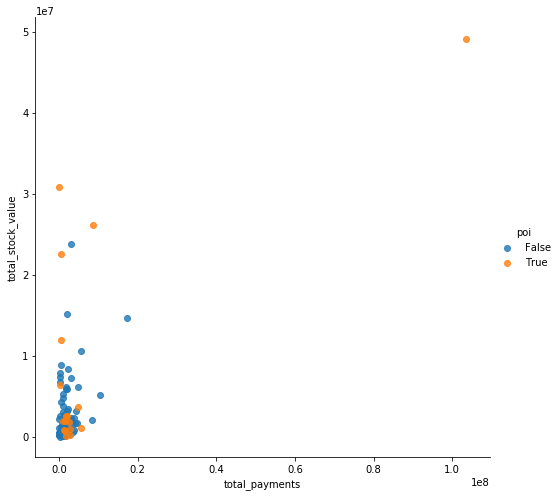

In [9]:
# Graph the salary and bonus's for each name and see if there is a correlation to the POI's
sns.lmplot('total_payments', 'total_stock_value', data=df, hue='poi', fit_reg=False, height=7)
plt.show()


I can see that there is one point that is much larger than the others. To find out which point this is, I am going to sort the data by 'total_payments'.

In [10]:
# Find outliers by sorting
df.sort_values(by=['total_payments'],ascending=False).head()


,salary,to_messages,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,other,from_this_person_to_poi,poi,from_poi_to_this_person
LAY KENNETH L,1072321.0,4273.0,103559793.0,34348384.0,7000000.0,14761694.0,2411.0,49110078.0,99832.0,36.0,10359729.0,16.0,True,123.0
FREVERT MARK A,1060932.0,3275.0,17252530.0,10433518.0,2000000.0,4188667.0,2979.0,14622185.0,86987.0,21.0,7427621.0,6.0,False,242.0
BHATNAGAR SANJAY,NaN,523.0,15456290.0,2604490.0,NaN,-2604490.0,463.0,NaN,NaN,29.0,137864.0,1.0,False,0.0
LAVORATO JOHN J,339288.0,7259.0,10425757.0,4158995.0,8000000.0,1008149.0,3962.0,5167144.0,49537.0,2585.0,1552.0,411.0,False,528.0
SKILLING JEFFREY K,1111258.0,3627.0,8682716.0,19250000.0,5600000.0,6843672.0,2042.0,26093672.0,29336.0,108.0,22122.0,30.0,True,88.0


In [11]:
# Drop LAY KENNETH L as he is an outlier
df = df.drop(['LAY KENNETH L'])


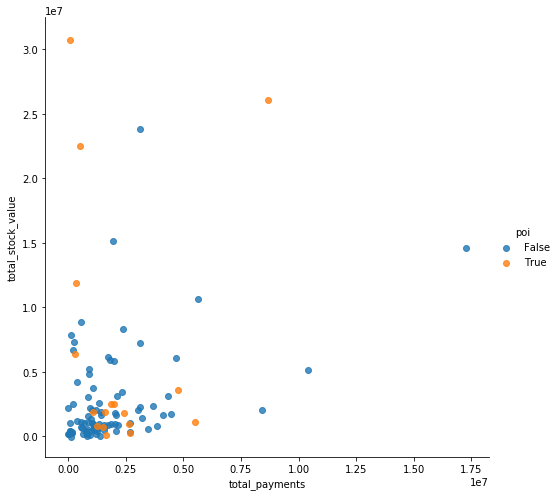

In [12]:
# Graph the salary and bonus's for each name and see if there is a correlation to the POI's
sns.lmplot('total_payments', 'total_stock_value', data=df, hue='poi', fit_reg=False, height=7)
plt.show()

This graph is much easier to read with the outliers. 

# Question 2 

**What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.** 



I also want to look at their total compensation package, total_payments plus total_stock_value to see if this feature would provide better results.

I created the feature 'total_compensation' using the sum of 'total_payments' and 'total_stock_value'. This value fully emcompasses how an employee was compensated and could provide more information as to whether the person could be considered a 'poi'.

In [13]:
# Create and add feature to the dataframe.
df['total_compensation'] = df.apply(lambda row: float(row.total_payments + 
                                                      row.total_stock_value), axis=1)


I want to see if there is a correlation between 'total_compensation' and 'from_this_person_to_poi' or 'from_to_poi_this_person'. 

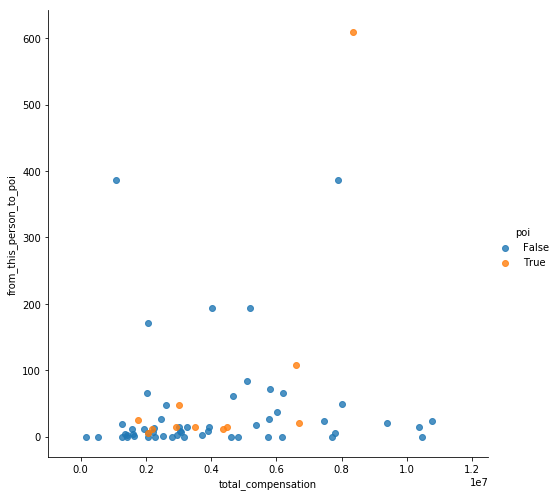

In [14]:
sns.lmplot('total_compensation', 'from_this_person_to_poi', 
           data=df, hue='poi', fit_reg=False, 
           height=7)

sns.lmplot('total_compensation', 'from_to_poi_this_person', 
           data=df, hue='poi', fit_reg=False, 
           height=7)

There does seem to be some type of correlation between this data. 

I will now use SKLearn's SelectKBest method for seeing which 5 features will have the highest F-Score. 

In [15]:
# Setting emply features list.
features_list = []

# Append features to the list
for col in df.columns:
    features_list.append(col)

# Move 'poi' to front of list
features_list.insert(0, features_list.pop(features_list.index('poi')))

In [16]:
# Renaming to my_dataset
my_dataset = df

# Replacing the np.nan values with the string 'NaN' for preprocessing.
my_dataset = my_dataset.replace(np.nan, 0)

# Converting data back to dict for sklearn manipulation.
my_dataset = my_dataset.to_dict('index')


In [18]:
# Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


In [20]:
# Import and run SelectKbest
from sklearn.feature_selection import SelectKBest, f_classif

clf = SelectKBest(f_classif, k=5)
clf.fit_transform(features,labels)

# Print the resulting labels
k_best_lables = df.columns[clf.get_support(indices=True)]
k_best_lables_scores = clf.scores_[clf.get_support()]

labels_scores = list(zip(k_best_lables, k_best_lables_scores))
labels_scores_df = pd.DataFrame(data = labels_scores, columns=['Feat_names', 'F_Scores'])

#Sort the dataframe for better visualization
labels_scores_df_sorted = labels_scores_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(labels_scores_df_sorted)

/Users/preston/PycharmProjects/MLProject/venv/lib/python2.7/site-packages/sklearn/utils/__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


####  Select K Best results

From the code above, you can see that SelectKBest returned these five features and their respective F-Scores as the best features.  

| Feat_names  |  F_Scores |
| --- | --- |
| exercised_stock_options | 15.967730 |
|  total_stock_value | 15.450997 |
| from_poi_to_this_person |  15.290707 |
|  bonus |  13.159868 |
|  salary |  11.488864 |

I can see that the feature I created, `'total_compensation'`, did not make the cut so I will not be using it in my analysis. 

## Task 4:
Try a varity of classifiers Please name your classifier clf for easy export below. Note that if you want to do PCA or other multi-stage operations, you'll need to use Pipelines. For more info: 
http://scikit-learn.org/stable/modules/pipeline.html

In [21]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features, labels)


GaussianNB(priors=None)

tester.py returns the following output

```
GaussianNB(priors=None)
        Accuracy: 0.82254       Precision: 0.38570      Recall: 0.25900 F1: 0.30990     F2: 0.27721
        Total predictions: 13000        True positives:  518    False positives:  825   False negatives: 1482   True negatives: 10175
```


In [22]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf.fit(features, labels)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

tester.py returns the following output

```
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
        Accuracy: 0.76262       Precision: 0.22154      Recall: 0.21600 F1: 0.21873     F2: 0.21709
        Total predictions: 13000        True positives:  432    False positives: 1518   False negatives: 1568   True negatives: 9482
```

In [23]:
### Use Sklearn's train_test_split model to separate data into testing and training data. 

from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [24]:
 
from sklearn import metrics

## Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(features_train, labels_train)
predict = nb_clf.predict(features_test)

print "Accuracy:", "{0:.0%}".format(metrics.accuracy_score(labels_test, predict))
print "Precision:", "{0:.0%}".format(metrics.precision_score(labels_test, predict))
print "Recall:", "{0:.0%}".format(metrics.recall_score(labels_test, predict))


Accuracy: 90%
Precision: 33%
Recall: 33%


In [25]:
## Support Vector Machine Classifier
from sklearn.svm import SVC
svm_clf = SVC(C=1000, kernel='rbf', gamma='auto')

svm_clf.fit(features_train, labels_train)
predict = svm_clf.predict(features_test)

print "Accuracy:", "{0:.0%}".format(metrics.accuracy_score(labels_test, predict))
print "Precision:", "{0:.0%}".format(metrics.average_precision_score(labels_test, predict))
print "Recall:", "{0:.0%}".format(metrics.recall_score(labels_test, predict, average='weighted'))

Accuracy: 93%
Precision: 54%
Recall: 93%


In [26]:
## Decision Tree
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(min_samples_split=30)

dt_clf.fit(features_train, labels_train)
predict = dt_clf.predict(features_test)

print "Accuracy:", "{0:.0%}".format(metrics.accuracy_score(labels_test, predict))
print "Precision:", "{0:.0%}".format(metrics.average_precision_score(labels_test, predict))
print "Recall:", "{0:.0%}".format(metrics.recall_score(labels_test, predict, average='weighted'))



Accuracy: 93%
Precision: 54%
Recall: 93%


## Task 5: 
Tune your classifier to achieve better than .3 precision and recall using our testing script. Check the tester.py script in the final project folder for details on the evaluation method, especially the test_classifier function. Because of the small size of the dataset, the script uses stratified shuffle split cross validation. For more info: http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html


**1. Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?**

> The goal of this project is to train a supervised maching learning algorithm using data obtained from the Enron Scandal. This data set contains financial information and email data from various employees in the former company. Enron was an energy commodities and services corporation that went bankrupt in 2001 due to fraud. You can learn more about the scandal [here](https://en.wikipedia.org/wiki/Enron_scandal). This ML project will attempt to classify whether an Enron employee was a person of interest (POI).  
<br>
I converted the dataset to a pandas dataframe for easier manipulation and cleaning. Using `df.info()` i could set that there were 146 rows(names) and 21 columns(attributes). Since this was a low enough amount, I printed the names and reviewed for anything that might stick out to me. The rows, 'TOTAL' and 'THE TRAVEL AGENCY IN THE PARK' stuck out particularly as these are not names. I decided to remove them from the dataset using the `df.drop()` function. While reviewing the data table, I also noticed that 'LOCKHART EUGENE E' had no data and was not listed as a 'poi' so I removed this as well. I then replaced `'NaN'` values with `np.nan` to help with my data exploration.  
<br>
Since it is difficult to work with missing data, I decided to remove the features that had more than 50% missing data. Their were 6 features that were missing more than 50% data, these were the features that I removed.  
- long_term_incentive          0.454545
- deferred_income              0.335664
- deferral_payments            0.265734
- restricted_stock_deferred    0.118881
- director_fees                0.111888
- loan_advances                0.020979

> I used a scatterplot chart to show the correlation between total_payments and total_stock_value. I could see that there was a datapoint that was clearly an outlier. Sorting the chart by 'total_payments', I could see that this was 'LAY KENNETH L' with 103,559,793.00. The next highest was 'FREVERT MARK A' with 17,252,530.00. I decided to remove 'LAY KENNETH L' so it would not alter the output too much. 


**2. What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.** 

> I also want to look at their total compensation package, total_payments plus total_stock_value to see if this feature would provide better results.
<br>
I created the feature 'total_compensation' using the sum of 'total_payments' and 'total_stock_value'. This value fully emcompasses how an employee was compensated and could provide more information as to whether the person could be considered a 'poi'.
<br>
After running SelectKBest on my data, 'total_compensation' did not make the cut, but 'from_poi_with_shared_receipt_percentage' returned an F-Score of 983.25. 



**3. What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?**

> I tried many different algorithms to see which ones would have the best effect on this dataset. The algorithms included: 
- Gaussian Naive Bayes
- Support Vector Machine
- Decision Tree

> The ranged from a high of 86% Naive Bayes to 84% with Decision Tree. 


**4. What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).**

> Tuning is essentially selecting the best parameters for an algorithm to optimize its performance. I experimented with the C* paramenter in the SVM algorithm to see if there would be an effect on the outcome. By increasing the C parameter  I was able to increase the Accuracy to 91%, Precision to 67%, and Recall stayed the same at 40%.  
<br>
*C : float, optional (default=1.0)  
Definition: Penalty parameter C of the error term.


**5. What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?**

> Validation is the process of retaining a sample of the data set and using it to test the classifier once it has been tuned and trained. This is important, because if the classifier is only tuned using training and test sets, it may become overfitted to the test set and thus underperform in real life applications. The validation set therefore acts as a final check to ensure overfitting has not occurred.  
<br>
I used K-fold cross-validation function to randomly split the data into k samples and train the classifier on each of the k-1 samples, before validating it on the remaining data.  


**6. Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance.**

> I evaluated my classifier using the 'accuracy', ‘precision’ and ‘recall’ metrics. The precision metric, measures the exactness of the results and recall metric measures the completeness, or how much data was lost. In the context of this investigation, precision measures the proportion of correctly identified POIs out of the total number of individuals classified as POIs by our classifier. Recall measures the proportion of correctly identified POIs out of the total number of POIs in the data set. Running algorithms on the data has produced the following results. 

| Naive Bayes | Support Vector Machine | Decision Tree | Ada Boost | Random Forest
| --- | --- | --- | ---| --- |
Accuracy | 88% | 91% | 84% | 84% | 86%
Precision | 50% | 67% | 33% | 25% | 33%
Recall | 40% | 40% | 40% | 20% | 20%

